## Work
1. 試比較 save_best_only 與否的差異
2. 請僅存入將 save_weights_only 設定為 True, 並嘗試 reset ipynb 並將模型與權重重新建回並預測 x_test

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.models import Sequential, Model
from keras.layers import Dense
def build_mlp(input, output, neurons):
  model = Sequential()
  j = 0
  for n in neurons:
    print(n)
    j+=1
    if j ==1:
      model.add(Dense(units=n, input_dim= input.shape[1], activation='relu' ))
    else: 
      model.add(Dense(units=n, activation='relu' ))
  model.add(Dense(units=output, activation='softmax'))
    
  return model

In [6]:
"""Code Here
設定超參數
"""
epochs=100
batch_size=256

In [10]:
# 載入 Callbacks
"""Code Here
設定 callbacks: model checkpoint
"""
from keras.callbacks import ModelCheckpoint
mcp = ModelCheckpoint(filepath="./tmp.h5", 
                             monitor="val_loss", 
                             save_best_only=True)
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
model = build_mlp(x_train,len(y_train[0]), [256,128,64])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train, epochs = epochs, batch_size= batch_size, validation_data=(x_test, y_test), callbacks=[mcp])


# Collect results
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

from keras.models import load_model
# Load back
cifar = load_model("./tmp.h5")
loss_loadback, acc_loadback = cifar.evaluate(x_test, y_test)

256
128
64
Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 3s 69us/step - loss: 1.9598 - accuracy: 0.2933 - val_loss: 1.8474 - val_accuracy: 0.3425
Epoch 2/100
50000/50000 [==============================] - 3s 68us/step - loss: 1.7501 - accuracy: 0.3718 - val_loss: 1.6915 - val_accuracy: 0.3961
Epoch 3/100
50000/50000 [==============================] - 3s 70us/step - loss: 1.6587 - accuracy: 0.4064 - val_loss: 1.6246 - val_accuracy: 0.4184
Epoch 4/100
50000/50000 [==============================] - 4s 70us/step - loss: 1.5868 - accuracy: 0.4349 - val_loss: 1.6046 - val_accuracy: 0.4354
Epoch 5/100
50000/50000 [==============================] - 4s 70us/step - loss: 1.5592 - accuracy: 0.4446 - val_loss: 1.5341 - val_accuracy: 0.4509
Epoch 6/100
50000/50000 [==============================] - 4s 71us/step - loss: 1.5211 - accuracy: 0.4564 - val_loss: 1.5328 - val_accuracy: 0.4539
Epoch 7/100
50000/50000 [==========================

50000/50000 [==============================] - 4s 71us/step - loss: 0.9381 - accuracy: 0.6654 - val_loss: 1.5101 - val_accuracy: 0.5083
Epoch 56/100
50000/50000 [==============================] - 4s 71us/step - loss: 0.9267 - accuracy: 0.6698 - val_loss: 1.5154 - val_accuracy: 0.5097
Epoch 57/100
50000/50000 [==============================] - 4s 71us/step - loss: 0.9205 - accuracy: 0.6686 - val_loss: 1.4953 - val_accuracy: 0.5188
Epoch 58/100
50000/50000 [==============================] - 4s 72us/step - loss: 0.9119 - accuracy: 0.6762 - val_loss: 1.4953 - val_accuracy: 0.5194
Epoch 59/100
50000/50000 [==============================] - 4s 71us/step - loss: 0.9121 - accuracy: 0.6752 - val_loss: 1.5257 - val_accuracy: 0.5205
Epoch 60/100
50000/50000 [==============================] - 4s 71us/step - loss: 0.9021 - accuracy: 0.6786 - val_loss: 1.5478 - val_accuracy: 0.5224
Epoch 61/100
50000/50000 [==============================] - 4s 72us/step - loss: 0.8947 - accuracy: 0.6804 - val_loss: 

In [11]:

print(loss_loadback, acc_loadback)

1.366472105407715 0.5231000185012817


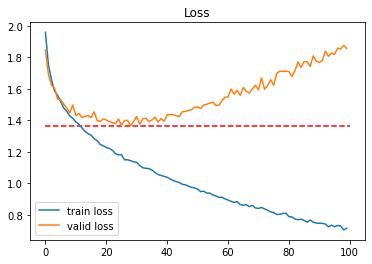

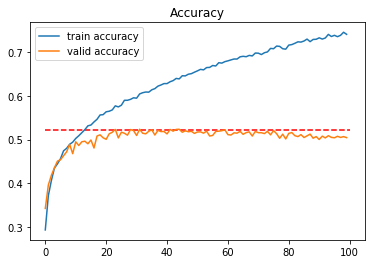

In [12]:

"""Code Here
將結果繪出
"""

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.hlines(y=loss_loadback, xmin=0, xmax=len(train_loss), colors='r', linestyles='--')
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.hlines(y=acc_loadback, xmin=0, xmax=len(train_loss), colors='r', linestyles='--')
plt.legend()
plt.title("Accuracy")
plt.show()